In [4]:
import pandas as pd
import numpy as np
import re
print(pd.__version__)
print(np.__version__)

0.25.3
1.17.3


In [5]:
# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어옵니다.
petitions = pd.read_csv('/content/drive/My Drive/colab/국민청원 데이터 분석/DATA/petition.csv', parse_dates=['start', 'end'])
# 데이터의 크기가 어느정도인지 봅니다.
petitions.shape

(395547, 8)

In [6]:
petitions.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [7]:
# 전체 데이터 중 투표가 1000건 이상인 데이터를 기준으로 가져옵니다. 아웃라이어 데이터 제거를 위해 20만건 이상 데이터도 제거합니다.
petition_remove_outlier = petitions.loc[(petitions['votes'] > 100) & (petitions['votes'] < 10000)]
petition_remove_outlier.shape

(17729, 8)

In [0]:
df = petition_remove_outlier.copy()

In [9]:
df.describe()

,article_id,answered,votes
count,17729.000000,17729.0,17729.000000
mean,273607.968639,0.0,687.453833
std,135858.650931,0.0,1283.127307
min,28.000000,0.0,101.000000
25%,173151.000000,0.0,142.000000
50%,269421.000000,0.0,227.000000
75%,398158.000000,0.0,540.000000
max,517095.000000,0.0,9988.000000


# 이진분류 대상 정하기

In [10]:
df.loc[df['answered'] == 1].shape

(0, 8)

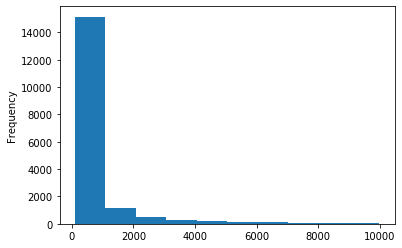

In [11]:
%matplotlib inline
df['votes'].plot.hist()

# 투표수를 평균보다 높게 혹은 적게 받는지 예측해 보기

In [0]:
# 기본값을 0으로 세팅
df['votes_pos_neg'] = 0

In [13]:
votes_mean = df['votes'].mean()
votes_mean

687.4538327034802

In [0]:
# 평균 투표수를 구해봅시다.
df['votes_pos_neg'] = (df['votes'] > votes_mean) == 1
# 타입을 boolean 에서 int로 변경해 줍니다.
df['votes_pos_neg'] = df['votes_pos_neg'].astype(int)

In [0]:
# 샘플로 보고 싶은 인덱스의 번호르를 넣어보세요
sample_index = 30

In [16]:
sample_title = df['title'][sample_index]
sample_title

'국가유공자 예우및 지원에 관한 법룰 시행령 개정 청원'

In [0]:
sample_content = petitions['content'][sample_index]

In [18]:
sample_content

'간절히 간절히 간청 드립니다.\\n지금부터 67년전 1950년 6.25전쟁때 조국 대한민국이 위태로운 시점에 우리들 아버님께서는 조국의 부름을 받고 젊은 나이에 목숨을 바쳐 대한민국을 지켜 내셨습니다.\\n나라가 불러서, 나라를 위해 전장에 나가 싸우다가 총탄에 맞아 쓰러져 돌아가신 아버지는 어느 산천에 묻혀 계신지 아직껏 유골마저 찾지 못하고 있습니다.\\n저희들은 6.25전몰군경 유자녀입니다.\\n1997년 12월31일 이전에 어머니가 사망하면 매달 수당을 받고 1998년 1월1일 이후에 어머니가 사망하면 수당을 줄 수 없다는 해괴망측한 악법이 우리들을 옭아매어 똑 같은 유자녀들간에 억울한 차별을 하며 16년간의 긴세월동안 우리들을 홀대하여 가슴에 피멍을 들게 했습니다.\\n똑 같이 전장에서 아버지를 잃은 유자녀들을 어머니의 사망 날짜 기준으로 분리해서 갈라놓았습니다. 그것도 이틀도 아니고 한 달도 아닌 딱 하루사이로 말입니다.\\n현재 수당 지급액\\n1997년 이전 모친  사망 유자녀         월 1,004,000원\\n1998년 이후 모친  사망 유자녀         월   118,000원.\\n"국가유공자등 예우의 지원에 관한 법률"이 2015년 12월 29일통과되어 기수당유자녀와 동등한대도 너무나 어이없는 수당에 항의하자 ‘주면 주는 대로 받지 웬 말이 많으냐고’ 하며 동냥 거지 취급하며 외면해 버립니다.\\n세상 어느 나라도 어머니의 죽음을 가지고 이런 해괴망측하고 비굴한 악법을 만들어서 불쌍한 유자녀들을 울리는 나라는 없을 것이며 우리들의 아픔을 살펴서 해결해줘야 하는 보훈처가 우리들을 무시합니다.\\n이런 사정을 다른 나라에 알려진다면 나라 창피가 될 것입니다.\\n6.25전몰군경 유자녀 수당이 10배나 차이 나는 점을 시정해 주셔서 현충일 추념사에서 "보훈 가족이 자존감을 지키며 살아가실 수 있도록 하겠습니다."라는 말씀이 실현되어 6.25미수당 유자녀들이 자존감을 지키며 살아가게 되기를 간절히 간청드립니다..'

In [0]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    # 중복으로 생성된 공백값을 제거합니다.
    text = re.sub(' +', ' ', text)
    return text

In [0]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['안녕', '있습니다', '그', '년도', '안녕하세요', '하는', '및', '제', '할', '하고', '더', '대한', '한', '그리고', '월', '저는', '없는', '입니다', '등', '일', '많은', '이런', '것은', '왜','같은', '같습니다', '없습니다', '위해', '한다']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [0]:
pre_sample_content = preprocessing(sample_content)
pre_sample_content = remove_stopwords(pre_sample_content)

In [22]:
%time df['content_preprocessing'] = df['content'].apply(preprocessing)

CPU times: user 1.86 s, sys: 24 ms, total: 1.88 s
Wall time: 1.89 s


In [23]:
%time df['content_preprocessing2'] = df['content_preprocessing'].apply(remove_stopwords)

CPU times: user 1.55 s, sys: 25 ms, total: 1.57 s
Wall time: 1.57 s


#학습세트와 테스트세트 만들기

In [0]:
df = df.reindex()

In [25]:
df.shape

(17729, 11)

In [26]:
split_count = int(df.shape[0] * 0.7)
split_count

12410

In [27]:
df_train = df[:split_count].copy()
df_train.shape

(12410, 11)

In [28]:
df_train.head()

,article_id,start,end,answered,votes,category,title,content,votes_pos_neg,content_preprocessing,content_preprocessing2
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,1,존경하옵는 문재인대통령님께 저는 중국원양자원이라는 KOSPI상장사의 소액 주주입니...,존경하옵는 문재인대통령님께 중국원양자원이라는 KOSPI상장사의 소액 주주입니다 중...
13,34,2017-08-19,2017-09-18,0,679,기타,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...,0,현황 우리들 아버지께서는 여년전 북의 남침으로 조국이 위기에 처했을 때 젊은 목숨...,현황 우리들 아버지께서는 여년전 북의 남침으로 조국이 위기에 처했을 때 젊은 목숨...
16,37,2017-08-19,2017-09-18,0,415,기타,황우석박사님 연구재개 허용 촉구합니다.,국민의 70% 이상이 황우석박사님을 응원하고 지지하고 있습니다.\n*2007년 1월...,0,국민의 이상이 황우석박사님을 응원하고 지지하고 있습니다 년 월 중앙일보 여론조 국민...,국민의 이상이 황우석박사님을 응원하고 지지하고 년 중앙일보 여론조 국민 여론조사 황...
18,40,2017-08-19,2017-09-18,0,218,외교/통일/국방,국가유공자등 예우및 지우너에 관한 법률 시행령 개정,지금부터 67년전 1950년 6.25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...,0,지금부터 년전 년 전쟁때 조국 대한민국이 위태로운 시점에 우리들 아버님께서는 조국의...,지금부터 년전 년 전쟁때 조국 대한민국이 위태로운 시점에 우리들 아버님께서는 조국의...
19,41,2017-08-19,2017-09-18,0,227,외교/통일/국방,국가유공자등 예우및 지우너에 관한 법률 시행령 개정,지금부터 67년전 1950년 6.25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...,0,지금부터 년전 년 전쟁때 조국 대한민국이 위태로운 시점에 우리들 아버님께서는 조국의...,지금부터 년전 년 전쟁때 조국 대한민국이 위태로운 시점에 우리들 아버님께서는 조국의...


In [29]:
df_train.loc[df_train['votes_pos_neg'] == 1].shape

(2574, 11)

In [30]:
# 테스트 세트
df_test = df[split_count:].copy()
df_test.shape

(5319, 11)

In [31]:
df_test.head()

,article_id,start,end,answered,votes,category,title,content,votes_pos_neg,content_preprocessing,content_preprocessing2
281221,365194,2018-09-03,2018-10-03,0,212,교통/건축/국토,화물차 과적제도에 관한 건,안녕하십니까.\n화물차 과적제도의 오류에 관해 여쭤보고 싶습니다.\n화물업계를 모르...,0,안녕하십니까 화물차 과적제도의 오류에 관해 여쭤보고 싶습니다 화물업계를 모르는 대부...,안녕하십니까 화물차 과적제도의 오류에 관해 여쭤보고 싶습니다 화물업계를 모르는 대부...
281226,365199,2018-09-03,2018-10-03,0,192,문화/예술/체육/언론,"선동열 병역비리 조사 청원합니다,","선동열은 말도 안된 선수을 선발 해서 병역면제을 받게 만든 병역 브로커 입니다,\n...",0,선동열은 말도 안된 선수을 선발 해서 병역면제을 받게 만든 병역 브로커 입니다 실책...,선동열은 말도 안된 선수을 선발 해서 병역면제을 받게 만든 병역 브로커 실책 위 삼...
281236,365209,2018-09-03,2018-10-03,0,154,기타,인천시 성매매 여성들에게 자활자금 2260만원이 현실인가요.?,대한민국에서 언제부터 성매매 여성에게\n자활 지원이랍시고 돈을 지원해준단 생각을\n...,0,대한민국에서 언제부터 성매매 여성에게 자활 지원이랍시고 돈을 지원해준단 생각을 하였...,대한민국에서 언제부터 성매매 여성에게 자활 지원이랍시고 돈을 지원해준단 생각을 하였...
281275,365259,2018-09-04,2018-10-04,0,823,교통/건축/국토,"무주택자를 아파트 청약 1순위로, 유주택자를 2순위로 조정 부탁드립니다.","서민 주거 안정을 위해서라면 현재 1순위 청약기준을 무주택자 또는 1주택자가 아닌,...",1,서민 주거 안정을 위해서라면 현재 순위 청약기준을 무주택자 또는 주택자가 아닌 무주...,서민 주거 안정을 위해서라면 현재 순위 청약기준을 무주택자 또는 주택자가 아닌 무주...
281284,365269,2018-09-04,2018-10-04,0,115,안전/환경,지구를 위해서 페트병 라벨분리를 의무화 시켜주세요!,"안녕하세요 지구를 사랑하고, 현재 망가져가는 지구를 바라볼 때 마다 마음이 아픈 학...",0,안녕하세요 지구를 사랑하고 현재 망가져가는 지구를 바라볼 때 마다 마음이 아픈 학생...,지구를 사랑하고 현재 망가져가는 지구를 바라볼 때 마다 마음이 아픈 학생입니다 부디...


In [32]:
df_test.loc[df_test['votes_pos_neg'] == 1].shape

(1103, 11)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
vectorizer = CountVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋다. 
                             ngram_range=(1, 3), # BOW의 단위를 1~3개로 지정합니다.
                             max_features = 2000 # 만들 피처의 수, 단어의 수가 된다.
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2000, min_df=2,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [35]:
%%time
train_feature_vector = vectorizer.fit_transform(df_train['content_preprocessing2'])
train_feature_vector

CPU times: user 29.3 s, sys: 799 ms, total: 30.1 s
Wall time: 30.1 s


In [36]:
%%time
test_feature_vector = vectorizer.fit_transform(df_test['content_preprocessing2'])

CPU times: user 14.9 s, sys: 195 ms, total: 15.1 s
Wall time: 15.2 s


In [37]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

2000


['aid',
 'article',
 'articleview',
 'articleview html idxno',
 'a는',
 'cctv',
 'cctv를',
 'co',
 'co kr',
 'co kr news']

In [38]:
dist = np.sum(train_feature_vector, axis=0)
pd.DataFrame(dist, columns=vocab)

,aid,article,articleview,articleview html idxno,a는,cctv,cctv를,co,co kr,co kr news,com,com main,com main read,eb,ec,go,go kr,html,html idxno,http,http news,http news naver,http www,https,https news,https news naver,https www,idxno,kr,kr news,lsd,lsd mid,lsd mid sec,main,main read,main read nhn,mid,mid sec,mid sec sid,mode,...,형사,혜택을,호소합니다,혹시,혹은,혼자,화가,화물차,확실한,확인,확인을,확인하고,환경,환경에서,환경을,환자,환자가,환자를,환자의,활동을,황당한,회사,회사가,회사는,회사를,회사에,회사에서,회사의,회장,후에,훨씬,희망을,힘든,힘들게,힘들고,힘들어,힘듭니다,힘없는,힘을,힘이
0,237,191,155,129,443,426,187,882,170,159,222,214,150,307,1379,334,178,536,546,266,134,165,133,132,745,199,150,192,174,167,180,159,159,197,181,140,215,192,174,492,...,388,123,156,575,263,134,251,164,125,129,200,123,178,144,182,171,127,152,165,167,304,168,180,181,149,218,213,145,179,316,122,238,495,340,136,138,163,195,378,242


# TfidfTransformer

+ norm='l2' 각 문서의 피처 벡터를 어떻게 벡터 정규화 할지 정한다.
  + L2 : 벡터의 각 원소의 제곱의 합이 1이 되도록 만드는 것이고 기본 값
  +L1 : 벡터의 각 원소의 절댓값의 합이 1이 되도록 크기를 조절
+smooth_idf=False
  + 피처를 만들 때 0으로 나오는 항목에 대해 작은 값을 더해서(스무딩을 해서) 피처를 만들지 아니면 그냥 생성할지를 결정
+sublinear_tf=False
+use_idf=True
  + TF-IDF를 사용해 피처를 만들 것인지 아니면 단어 빈도 자체를 사용할 것인지 여부

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False, use_idf=True)

In [41]:
%%time
train_feature_tfidf = transformer.fit_transform(train_feature_vector)
train_feature_tfidf.shape

CPU times: user 40.2 ms, sys: 995 µs, total: 41.2 ms
Wall time: 57.8 ms


In [42]:
%%time
test_feature_tfidf = transformer.fit_transform(test_feature_vector)
test_feature_tfidf.shape

CPU times: user 21 ms, sys: 0 ns, total: 21 ms
Wall time: 21.6 ms


In [43]:
test_feature_tfidf.shape

(5319, 2000)

# 랜덤포레스트로 학습시키기

In [44]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators = 100, n_jobs= -1, random_state=2019)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2019, verbose=0,
                       warm_start=False)

In [50]:
df_train[df_train['votes_pos_neg'] == 0]

,article_id,start,end,answered,votes,category,title,content,votes_pos_neg,content_preprocessing,content_preprocessing2
13,34,2017-08-19,2017-09-18,0,679,기타,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...,0,현황 우리들 아버지께서는 여년전 북의 남침으로 조국이 위기에 처했을 때 젊은 목숨...,현황 우리들 아버지께서는 여년전 북의 남침으로 조국이 위기에 처했을 때 젊은 목숨...
16,37,2017-08-19,2017-09-18,0,415,기타,황우석박사님 연구재개 허용 촉구합니다.,국민의 70% 이상이 황우석박사님을 응원하고 지지하고 있습니다.\n*2007년 1월...,0,국민의 이상이 황우석박사님을 응원하고 지지하고 있습니다 년 월 중앙일보 여론조 국민...,국민의 이상이 황우석박사님을 응원하고 지지하고 년 중앙일보 여론조 국민 여론조사 황...
18,40,2017-08-19,2017-09-18,0,218,외교/통일/국방,국가유공자등 예우및 지우너에 관한 법률 시행령 개정,지금부터 67년전 1950년 6.25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...,0,지금부터 년전 년 전쟁때 조국 대한민국이 위태로운 시점에 우리들 아버님께서는 조국의...,지금부터 년전 년 전쟁때 조국 대한민국이 위태로운 시점에 우리들 아버님께서는 조국의...
19,41,2017-08-19,2017-09-18,0,227,외교/통일/국방,국가유공자등 예우및 지우너에 관한 법률 시행령 개정,지금부터 67년전 1950년 6.25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...,0,지금부터 년전 년 전쟁때 조국 대한민국이 위태로운 시점에 우리들 아버님께서는 조국의...,지금부터 년전 년 전쟁때 조국 대한민국이 위태로운 시점에 우리들 아버님께서는 조국의...
20,42,2017-08-19,2017-09-18,0,173,육아/교육,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",0,대통령님 안녕하세요 저는 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 ...,대통령님 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 했을 때 공채 채...
...,...,...,...,...,...,...,...,...,...,...,...
281040,364965,2018-09-03,2018-10-03,0,205,정치개혁,선동열 오지환 군면제 비리 조사하라!!!,법을 교묘히 이용해 손쉽게 군면제 받을수 있는 방법을 찿아서 국민 정서를 무시하고 ...,0,법을 교묘히 이용해 손쉽게 군면제 받을수 있는 방법을 찿아서 국민 정서를 무시하고 ...,법을 교묘히 이용해 손쉽게 군면제 받을수 있는 방법을 찿아서 국민 정서를 무시하고 ...
281172,365128,2018-09-03,2018-10-03,0,102,행정,"보험사 의료자문제도, 보험금 지급거절 없애자",보험금 지급거부 위해 자문의사에게 연175억원 쓰는 보험사\n자문의 명단 의무적 공...,0,보험금 지급거부 위해 자문의사에게 연 억원 쓰는 보험사 자문의 명단 의무적 공개 세...,보험금 지급거부 자문의사에게 연 억원 쓰는 보험사 자문의 명단 의무적 공개 세금납부...
281194,365156,2018-09-03,2018-10-03,0,123,보건복지,국립소록도병원 자원봉사자 관리자임명과 관리 시스템 꼭 개선 해주세요,존경하는 박능후 보건복지부 장관님\n국립소록도 병원에 전문 자원봉사 관리자 임명하여...,0,존경하는 박능후 보건복지부 장관님 국립소록도 병원에 전문 자원봉사 관리자 임명하여 ...,존경하는 박능후 보건복지부 장관님 국립소록도 병원에 전문 자원봉사 관리자 임명하여 ...
281195,365157,2018-09-03,2018-10-03,0,209,교통/건축/국토,"경남(거제,울산,창원 등등) 집값 하락 대책마련",뉴스에는 서울 집값 안정화만 얘기가 나오는데 서울시민만 이 나라 국민 아닙니다.\n...,0,뉴스에는 서울 집값 안정화만 얘기가 나오는데 서울시민만 이 나라 국민 아닙니다 지금...,뉴스에는 서울 집값 안정화만 얘기가 나오는데 서울시민만 이 나라 국민 아닙니다 지금...


In [0]:
y_label = df_train['votes_pos_neg']

In [51]:
%time forest = forest.fit(train_feature_tfidf, y_label)

CPU times: user 31.3 s, sys: 34.5 ms, total: 31.4 s
Wall time: 16 s


# 평가하기

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=2019)

In [53]:
scoring = 'accuracy'
score = cross_val_score(forest, train_feature_tfidf, y_label, cv=k_fold, scoring=scoring)
score

array([0.79371475, 0.78847703, 0.80620467, 0.78686543, 0.772361  ])

In [54]:
round(np.mean(score)*100,2)

78.95

# 예측

In [55]:
# 테스트 데이터를 넣고 예측한다.
y_pred = forest.predict(test_feature_tfidf)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
y_pred.shape

(5319,)

In [57]:
# 예측 결과를 저장하기 위해 데이터프레임에 담아 준다.
output = pd.DataFrame(data={'votes_pos_neg_pred': y_pred})
output.head()

,votes_pos_neg_pred
0,0
1,0
2,0
3,0
4,0


In [61]:
# 0과 1이 어떻게 집계 되었는지 확인한다.
# 실제 데이터에는 답변 대상 건이 있는데 없는 것으로 예측되었다.
output['votes_pos_neg_pred'].value_counts()

0    5304
1      15
Name: votes_pos_neg_pred, dtype: int64

In [0]:
df_test['votes_pos_neg_pred'] = y_pred

In [0]:
df_test['pred_diff'] = np.abs(df_test['votes_pos_neg'] - df_test['votes_pos_neg_pred'])

In [70]:
df_test.head()

,article_id,start,end,answered,votes,category,title,content,votes_pos_neg,content_preprocessing,content_preprocessing2,votes_pos_neg_pred,pred_diff
281221,365194,2018-09-03,2018-10-03,0,212,교통/건축/국토,화물차 과적제도에 관한 건,안녕하십니까.\n화물차 과적제도의 오류에 관해 여쭤보고 싶습니다.\n화물업계를 모르...,0,안녕하십니까 화물차 과적제도의 오류에 관해 여쭤보고 싶습니다 화물업계를 모르는 대부...,안녕하십니까 화물차 과적제도의 오류에 관해 여쭤보고 싶습니다 화물업계를 모르는 대부...,0,0
281226,365199,2018-09-03,2018-10-03,0,192,문화/예술/체육/언론,"선동열 병역비리 조사 청원합니다,","선동열은 말도 안된 선수을 선발 해서 병역면제을 받게 만든 병역 브로커 입니다,\n...",0,선동열은 말도 안된 선수을 선발 해서 병역면제을 받게 만든 병역 브로커 입니다 실책...,선동열은 말도 안된 선수을 선발 해서 병역면제을 받게 만든 병역 브로커 실책 위 삼...,0,0
281236,365209,2018-09-03,2018-10-03,0,154,기타,인천시 성매매 여성들에게 자활자금 2260만원이 현실인가요.?,대한민국에서 언제부터 성매매 여성에게\n자활 지원이랍시고 돈을 지원해준단 생각을\n...,0,대한민국에서 언제부터 성매매 여성에게 자활 지원이랍시고 돈을 지원해준단 생각을 하였...,대한민국에서 언제부터 성매매 여성에게 자활 지원이랍시고 돈을 지원해준단 생각을 하였...,0,0
281275,365259,2018-09-04,2018-10-04,0,823,교통/건축/국토,"무주택자를 아파트 청약 1순위로, 유주택자를 2순위로 조정 부탁드립니다.","서민 주거 안정을 위해서라면 현재 1순위 청약기준을 무주택자 또는 1주택자가 아닌,...",1,서민 주거 안정을 위해서라면 현재 순위 청약기준을 무주택자 또는 주택자가 아닌 무주...,서민 주거 안정을 위해서라면 현재 순위 청약기준을 무주택자 또는 주택자가 아닌 무주...,0,1
281284,365269,2018-09-04,2018-10-04,0,115,안전/환경,지구를 위해서 페트병 라벨분리를 의무화 시켜주세요!,"안녕하세요 지구를 사랑하고, 현재 망가져가는 지구를 바라볼 때 마다 마음이 아픈 학...",0,안녕하세요 지구를 사랑하고 현재 망가져가는 지구를 바라볼 때 마다 마음이 아픈 학생...,지구를 사랑하고 현재 망가져가는 지구를 바라볼 때 마다 마음이 아픈 학생입니다 부디...,0,0


In [0]:
pred_diff = df_test['pred_diff'].value_counts()

In [73]:
print('전체 {}건의 데이터 중 {}건 예측'.format(y_pred.shape[0], pred_diff[0]))

전체 5319건의 데이터 중 4207건 예측


In [74]:
acc = (pred_diff[0] / y_pred.shape[0]) * 100
print('예측 비율{}'.format(acc))

예측 비율79.09381462680956
